# Objective

Perkembangan industri telekomunikasi sekarang sangat cepat. Hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi. Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya *internet service provider* yang dapat menimbulkan persaingan antar provider.

Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai **Customer Churn**. Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

Oleh sebab itu, perlunya dilakukan prediksi customer churn agar perusahaan bisa memetakan strategi bisnis untuk mempertahankan pelanggan.

Objectives:


*   Mengetahui karakteristik dan distribusi data
*   Mengetahui hubungan antar fitur
*   Berhasil memprediksi customer churn dengan akurasi terbaik


# Data Understanding

In [ ]:
# import library
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# membaca dataset
url = 'https://github.com/radi23/final-challenge-fga1/raw/main/Data%20Train_Challenge2.csv'
df_train = pd.read_csv(url)
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
# variabel dengan tipe kategorik
print('--Sebaran kelas pada fitur dengan tipe kategorik--\n')
i = 1
for col in df_train.columns:
  if df_train[col].dtype == 'object':

    print(f'{i}. {col}({df_train[col].nunique()}) -> {dict(df_train[col].value_counts())}')

    i += 1

--Sebaran kelas pada fitur dengan tipe kategorik--

1. state(51) -> {'WV': 139, 'MN': 108, 'ID': 106, 'AL': 101, 'VA': 100, 'OR': 99, 'TX': 98, 'UT': 97, 'NY': 96, 'NJ': 96, 'WY': 95, 'OH': 95, 'WI': 94, 'MA': 89, 'ME': 89, 'CT': 88, 'RI': 87, 'MI': 87, 'KS': 87, 'MD': 86, 'VT': 86, 'KY': 85, 'NV': 83, 'IN': 83, 'MS': 82, 'WA': 80, 'NC': 80, 'MO': 80, 'DE': 80, 'CO': 80, 'MT': 80, 'IL': 79, 'TN': 79, 'NM': 78, 'OK': 78, 'NH': 78, 'HI': 77, 'AZ': 77, 'FL': 76, 'SD': 75, 'NE': 73, 'DC': 72, 'SC': 72, 'AR': 71, 'LA': 69, 'PA': 67, 'ND': 67, 'GA': 64, 'IA': 62, 'AK': 61, 'CA': 39}
2. area_code(3) -> {'area_code_415': 2108, 'area_code_408': 1086, 'area_code_510': 1056}
3. international_plan(2) -> {'no': 3854, 'yes': 396}
4. voice_mail_plan(2) -> {'no': 3138, 'yes': 1112}
5. churn(2) -> {'no': 3652, 'yes': 598}


Deskripsi fitur:

1. state: Nama negara bagian di Amerika Serikat di mana pelanggan tersebut berada.
2. account_length: Jumlah hari sejak akun pelanggan dibuat atau diaktifkan.
3. area_code: Kode area telepon pelanggan.
4. international_plan: Apakah pelanggan memiliki paket rencana internasional (Yes/No).
5. voice_mail_plan: Apakah pelanggan memiliki paket rencana voicemail (Yes/No).
6. number_vmail_messages: Jumlah pesan voicemail yang diterima oleh pelanggan.
7. total_day_minutes: Total durasi waktu bicara selama siang hari.
8. total_day_calls: Jumlah panggilan yang dilakukan selama siang hari.
9. total_day_charge: Total biaya untuk panggilan selama siang hari.
10. total_eve_minutes: Total durasi waktu bicara selama malam hari.
11. total_eve_calls: Jumlah panggilan yang dilakukan selama malam hari.
12. total_eve_charge: Total biaya untuk panggilan selama malam hari.
13. total_night_minutes: Total durasi waktu bicara selama malam.
14. total_night_calls: Jumlah panggilan yang dilakukan selama malam.
15. total_night_charge: Total biaya untuk panggilan selama malam.
16. total_intl_minutes: Total durasi waktu bicara internasional.
17. total_intl_calls: Jumlah panggilan internasional yang dilakukan.
18. total_intl_charge: Total biaya untuk panggilan internasional.
19. number_customer_service_calls: Jumlah panggilan layanan pelanggan yang dilakukan.
20. churn: Variabel target, menunjukkan apakah pelanggan tersebut berpindah (Yes/No).

# EDA

## Univariate Analysis

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


Terlihat bahwa:
* `number_vmail_messages` memiliki nilai std yang lebih besar dari pada nilai mean. Hal ini menandakan terlalu banyak variasi pada fitur ini.
* `number_customer_service_calls` memiliki nilai std yang mendekati nilai mean. Hal ini juga menandakan terlalu banyak variasi pada fitur ini.

Variasi yang terlalu besar di suatu fitur akan menyulitkan mengetahui pola data pada fitur tersebut. Sehingga akan mempengaruhi performa dari model yang terbentuk.

In [ ]:
def bar_plot(column_name,df):
  value_counts = df[column_name].value_counts()
  colors = plt.cm.tab10(np.arange(len(value_counts)))

  x = value_counts.index
  y = value_counts

  plt.figure(figsize = (8,5))

  bars = plt.bar(x, y, color = colors)

  plt.title(f'Distribution of {column_name.replace("_"," ").title()}')

  plt.bar_label(bars,value_counts.tolist())

  plt.tight_layout()
  plt.show()

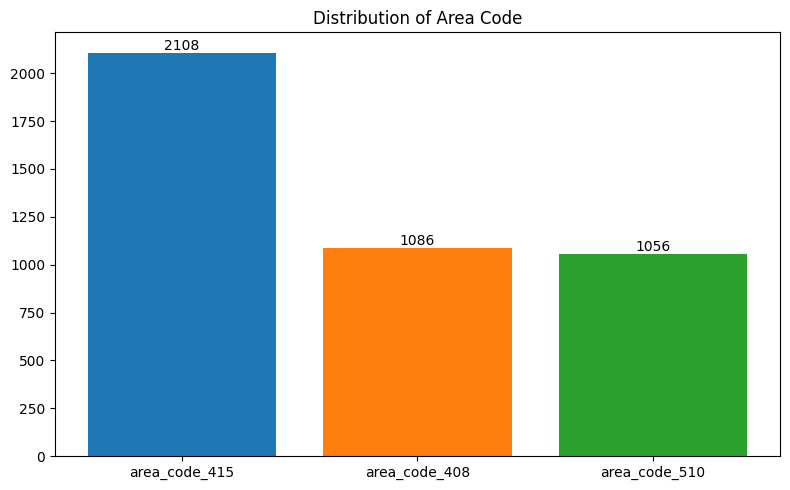

In [ ]:
# area_code
bar_plot('area_code',df_train)

Lebih dari setengah sebaran customer berasal dari `area_code_415`

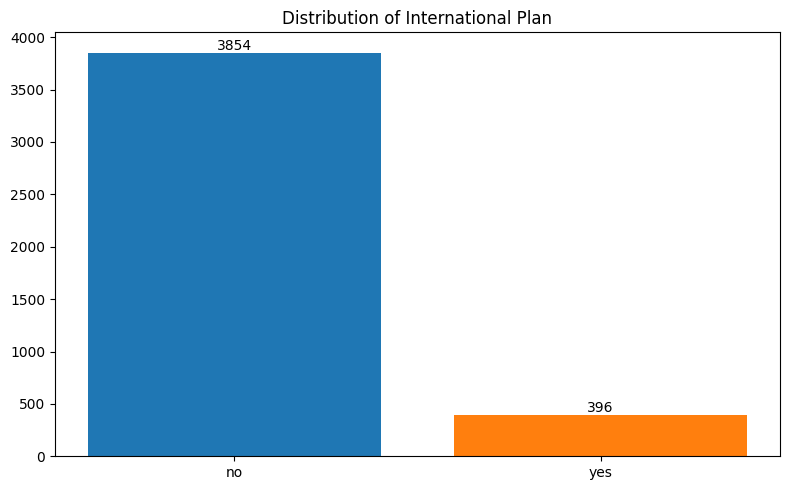

In [ ]:
# international_plan
bar_plot('international_plan',df_train)

Tidak banyak customer yang menggunakan layanan paket internasional atau hanya sekitar 9%

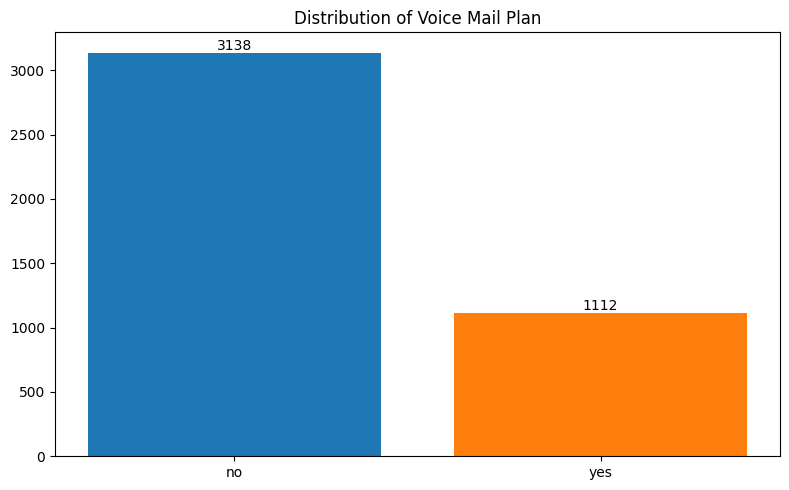

In [ ]:
# voice_mail_plan
bar_plot('voice_mail_plan',df_train)

Tidak banyak customer yang menggunakan layanan paket voice mail atau hanya sekitar 26%

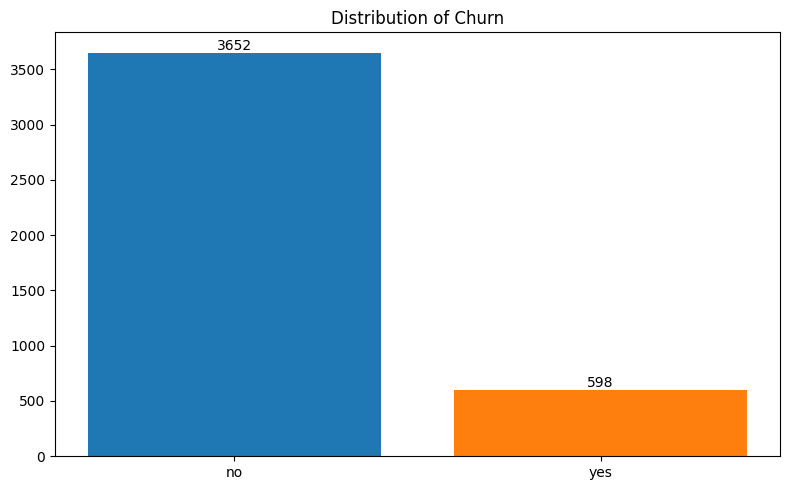

In [ ]:
# churn
bar_plot('churn',df_train)

* Tidak banyak customer yang melakukan churn hanya sekitar 14%.
* Fitur ini nantinya akan digunakan sebagai target dalam pemodelan. Disamping itu, terlihat bahwa jumlah kelas pada fitur ini sangat tidak seimbang, sehingga nantinya perlu dilakukan balancing.

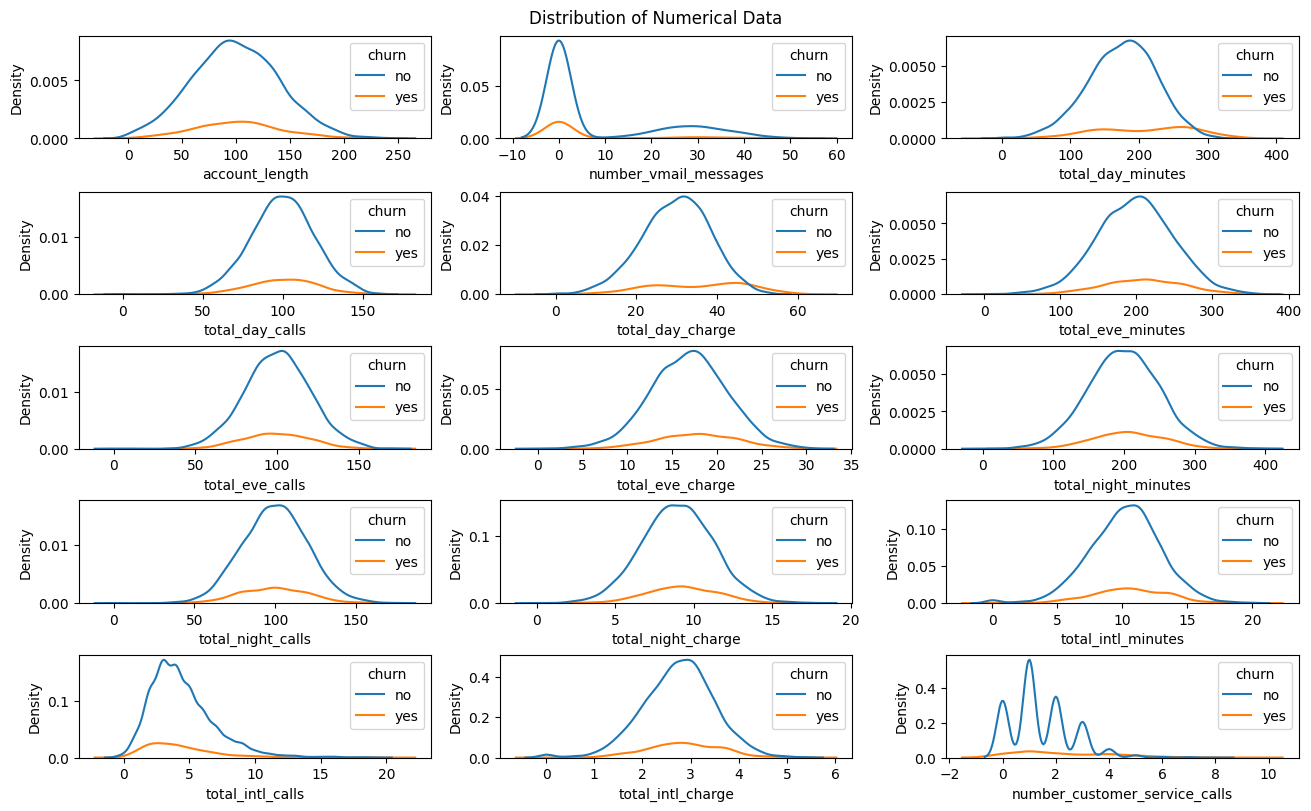

In [ ]:
# melihat sebaran data numerik
num_columns = [col for col in df_train.columns if (df_train[col].dtype == 'float') | (df_train[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=5,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.kdeplot(ax=ax, data = df_train, x = num_columns[i], hue = 'churn')
plt.suptitle('Distribution of Numerical Data')
plt.show()

Fitur `number_vmail_messages`, `total_intl_calss` dan `number_customer_service_calls` mengalami skewed positif sementara fitur lainnya cenderung simetris. Ketiga fitur memiliki banyak nilai ekstrim di dalamnya, khususnya pada fitur `number_vmail_messages`.

Kondisi tersebut dapat mempengaruhi hasil analisis dan model terbaik yang terbentuk nantinya. Dimana terkadang, dapat memberikan hasil yang salah (menyesatkan).



## Multivariate Analysis

In [ ]:
print('Karakterisik customer churn menurut account_length:\n')
pd.pivot_table(
    df_train[['account_length','churn']],
    values = ['account_length'],
    index = ['churn'],
    aggfunc = {'account_length':['min','max','mean']}
               ).reset_index(drop=False)

Karakterisik customer churn menurut account_length:



churn account_length                
                   max        mean min
0    no            243   99.924973   1
1   yes            225  102.137124   2

Customer yang masih setia menggunakan layanan provider, rata-rata telah memakai provider selama 100 hari. Sementara customer yang memutuskan untuk pindah layanan provider (churn), rata-rata telah memakai provider lebih lama 2 hari dari customer yang tidak churn.

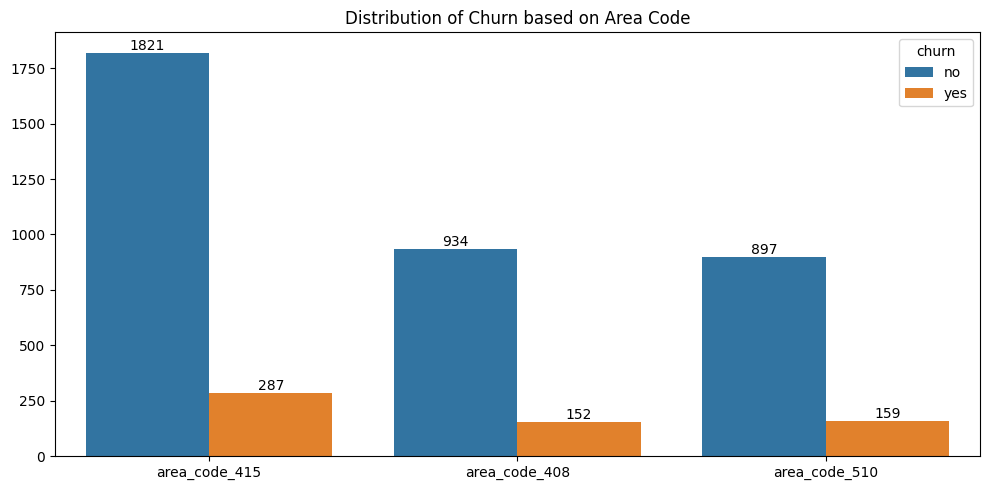

In [ ]:
# sebara churn berdasarkan area code
churn_area_code = df_train[['area_code','churn']].value_counts().reset_index(name='count')

# visualisasi
plt.figure(figsize=(10,5))
bars = sns.barplot(churn_area_code, x='area_code',y='count',hue='churn')

## set label
for i in bars.containers:
  bars.bar_label(i)

plt.title('Distribution of Churn based on Area Code')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Diperoleh informasi bahwa:

* pada `area_code_408` persentase customer churn sebesar 14%
* pada `area_code_415` persentase customer churn sebesar 13.6%
* pada `area_code_510` persentase customer churn sebesar 15.1%

Berdasarkan informasi di atas, persentase terbesar untuk customer berhenti menggunakan layanan provider adalah pada area code 510. Perusahaan penyedia provider perlu melakukan analisis lebih lanjut terkait faktor-faktor yang menjadi alasan customer berhenti menggunakan provider pada area tersebut.

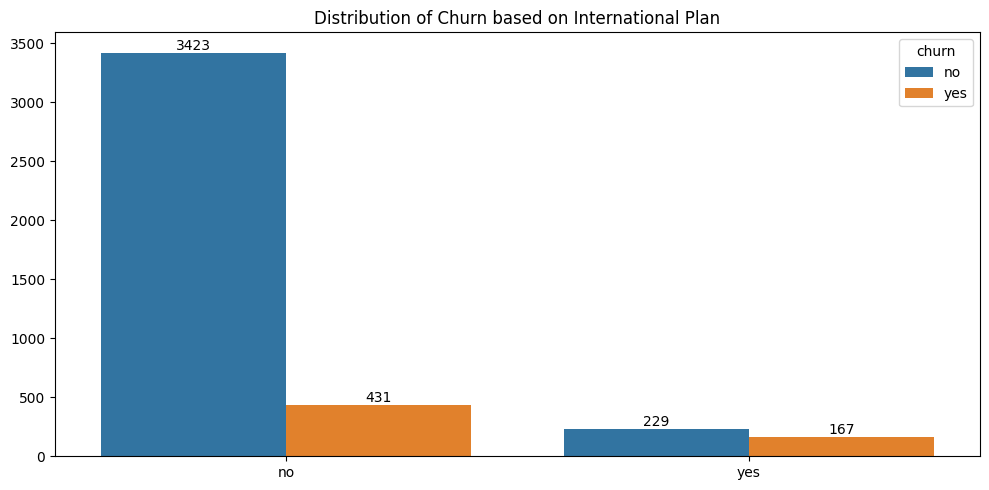

In [ ]:
# sebara churn berdasarkan international plan
churn_area_code = df_train[['international_plan','churn']].value_counts().reset_index(name='count')

# visualisasi
plt.figure(figsize=(10,5))
bars = sns.barplot(churn_area_code, x='international_plan',y='count',hue='churn')

## set label
for i in bars.containers:
  bars.bar_label(i)

plt.title('Distribution of Churn based on International Plan')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Diperoleh informasi bahwa:

* Untuk customer yang tidak menggunakan paket layanan internasional, tidak banyak customer yang melakukan churn. Bahkan tidak sampai setengah dari seluruh customer pada kategori ini.
* Untuk customer yang menggunakan paket layanan internasional, cukup banyak customer churn.

Perusahaan penyedia provider perlu melakukan evaluasi terhadap paket layanan internasional yang mungkin dari segi harga yang terlalu mahal jika dibandingkan dengan provider lain, sehingga banyak customer yang berhenti menggunakan provider dengan alasan tersebut.

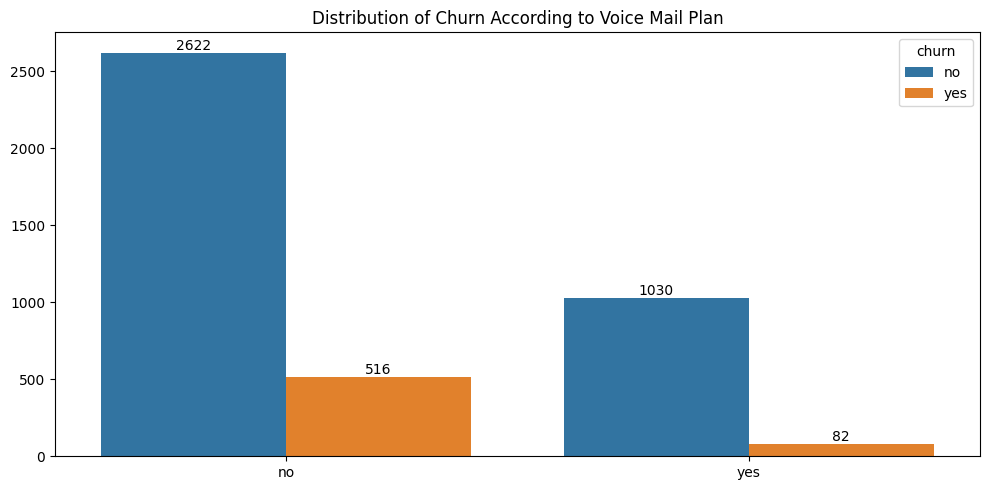

In [ ]:
# sebara churn berdasarkan voice mail plan
churn_area_code = df_train[['voice_mail_plan','churn']].value_counts().reset_index(name='count')

# visualisasi
plt.figure(figsize=(10,5))
bars = sns.barplot(churn_area_code, x='voice_mail_plan',y='count',hue='churn')

## set label
for i in bars.containers:
  bars.bar_label(i)

plt.title('Distribution of Churn According to Voice Mail Plan')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Diperoleh informasi bahwa:

* untuk customer yang tidak menggunakan paket layanan pesan suara, terlihat tidak banyak customer churn pada kelompok ini.
* untuk customer yang menggunakan paket layanan pesan suara, terlihat sangat sedikit customer churn pada kelompok ini.

paket layanan pesan suara yang disediakan oleh provider ini dapat dikatakan memuaskan bagi customer yang mungkin dari segi harga atau kualitas layanan yang lebih baik dari pada provider lain. Perusahaan penyedia provider dapat menjadikan paket layanan ini menjadi produk unggulan untuk menarik customer baru untuk menggunakan layanan provider ini.

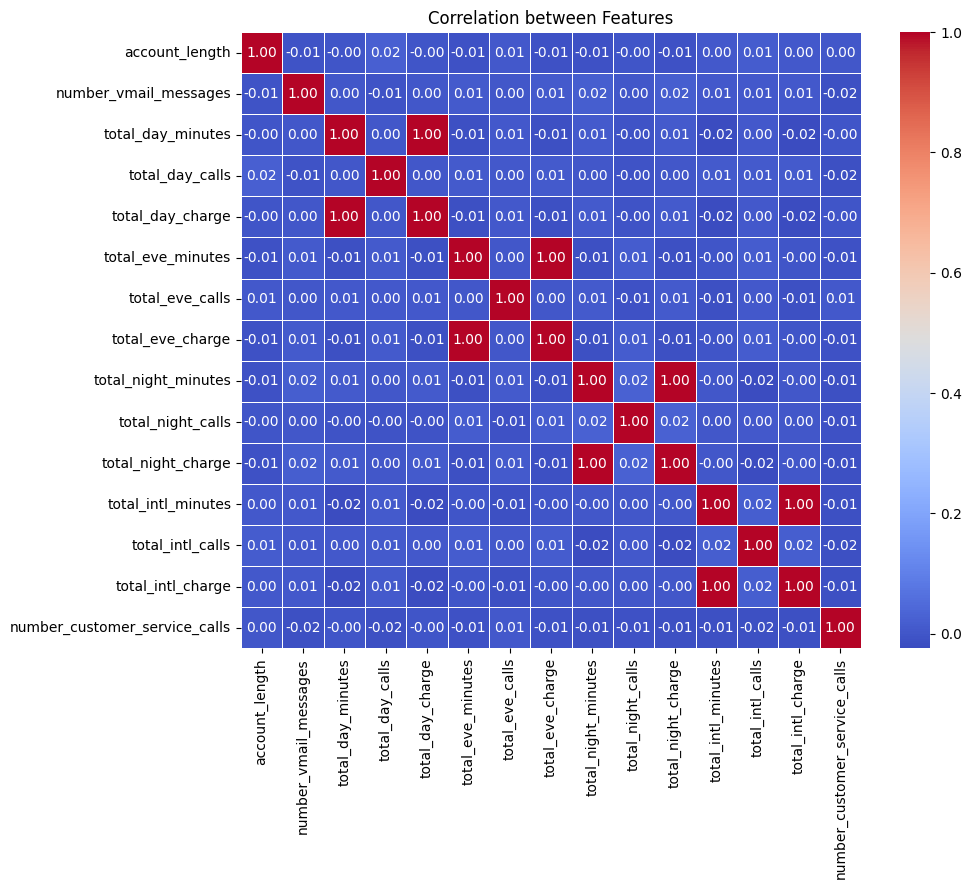

In [ ]:
list_column = [col for col in df_train.columns if (df_train[col].dtype == 'float') | (df_train[col].dtype == 'int')]

# uji korelasi
df_corr = df_train[list_column]

corr = df_corr.corr(method = 'pearson')

# visualisasi
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation between Features')
plt.show()

Diperoleh informasi bahwa:

* `total_day_minutes` vs `total_day_charge` berkorelasi positif sempurna.
* `total_eve_minutes` vs `total_eve_charge` berkorelasi positif sempurna.
* `total_night_minutes` vs `total_night_charge` berkorelasi positif sempurna.
* `total_intl_minutes` vs `total_intl_charge` berkorelasi positif sempurna.

Dapat disimpulkan bahwa semakin lama customer melakukan panggilan maka biaya yang dikeluarkan akan semakin besar. Selain itu, korelasi yang tinggi dari keempat kombinasi tersebut dapat diartikan jika terdapat gejala multikolinieritas. Sehingga nantinya salah satu fitur dari keempat kombinasi tersebut dapat dihapus.

In [ ]:
# mengambil variabel kategorik
df_corr = df_train[['area_code','international_plan','voice_mail_plan','churn']]
for column in df_corr.columns:
  if df_corr[column].nunique() == 2:
    df_corr[column] = df_corr[column].replace({'yes':1,'no':0})
  else:
    le = LabelEncoder()
    le.fit(df_train['area_code'].unique())
    df_corr[column] = le.transform(df_corr[column])

# membuat tabel kontingensi
contingency_table1 = pd.crosstab(index = df_train['churn'], columns = df_train['area_code'])
contingency_table2 = pd.crosstab(index = df_train['churn'], columns = df_train['international_plan'])
contingency_table3 = pd.crosstab(index = df_train['churn'], columns = df_train['voice_mail_plan'])

# uji korelasi
chi2_1, p_1,_,_ = chi2_contingency(contingency_table1)
chi2_2, p_2,_,_ = chi2_contingency(contingency_table2)
chi2_3, p_3,_,_ = chi2_contingency(contingency_table3)

print('alpha: 0.05\n')
print(f'Churn vs Area Code\nchi2: {chi2_1} p-value: {p_1}')
print()
print(f'Churn vs International Plan\nchi2: {chi2_2} p-value: {p_2}')
print()
print(f'Churn vs Voice Mail Plan\nchi2: {chi2_3} p-value: {p_3}')

alpha: 0.05

Churn vs Area Code
chi2: 1.2166542631365147 p-value: 0.5442605842955197

Churn vs International Plan
chi2: 282.65349013787664 p-value: 1.9831895448817517e-63

Churn vs Voice Mail Plan
chi2: 55.10981373962457 p-value: 1.139803854851859e-13


*   **Churn vs Area Code**: Terdapat bukti bahwa tidak ada hubungan yang signifikan antara keputusan pelanggan untuk menghentikan langganan provider dan kode wilayah customer.

*   **Churn vs International Plan**: Terdapat bukti bahwa ada hubungan yang signifikan antara keputusan pelanggan untuk menghentikan langganan provider dan apakah mereka memiliki paket panggilan internasional.


*   **Churn vs Voice Mail Plan**: Terdapat bukti bahwa ada hubungan yang signifikan antara keputusan pelanggan untuk menghentikan langganan provider dan apakah mereka memiliki paket voicemail.

Karena `area_code` tidak berkorelasi dengan `churn`, maka fitur ini tidak akan digunakan.



# Preprocessing

In [ ]:
df = df_train.copy()

## Missing Value

In [ ]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## duplicated

In [ ]:
print('Jumlah data duplikasi:',df.duplicated().sum())

Jumlah data duplikasi: 0


## Drop Unnecessary Features

Beberapa fitur yang akan di drop:
1. `state`: karena terlalu banyak label akan sulit untuk menemukan pola pada fitur tersebut.
2. `area_code`: karena tidak berkorelasi dengan `churn`.
3. `total_day_charge`, `total_eve_charge`, `total_night_charge`, dan `total_intl_charge`: untuk menghindari multikolinearitas
4. `number_vmail_messages`: varians data terlalu besar, sehingga akan sulit menemukan polanya.
5. `number_customer_service_calls`: nilai std mendekati mean yang berarti varians data cukup besar, sehingga akan sulit menemukan polanya.

In [ ]:
df = df.drop(['state','area_code','number_vmail_messages','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_customer_service_calls'], axis = 1)

## Outliers

In [ ]:
def iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  print('-'*30)
  print(f'{column}\n')
  print('IQR:',IQR)
  print('Lower Bound:',lower,'| Jumlah data:',np.array(df[column] < lower).sum())
  print('Upper Bound:',upper,'| Jumlah data:',np.array(df[column] > upper).sum())
  print('Total outliers:',(np.array(df[column] < lower).sum() + np.array(df[column] > upper).sum()))
  print('-'*30,'\n')

In [ ]:
df[[col for col in df.columns if df[col].dtype != 'object']].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.000,100.00,127.000,243.0
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.325,180.45,216.200,351.5
total_day_calls,4250.0,99.907294,19.850817,0.0,87.000,100.00,113.000,165.0
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.925,200.70,233.775,359.3
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.000,100.00,114.000,170.0
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.225,200.45,234.700,395.0
total_night_calls,4250.0,99.839529,20.093220,0.0,86.000,100.00,113.000,175.0
total_intl_minutes,4250.0,10.256071,2.760102,0.0,8.500,10.30,12.000,20.0
total_intl_calls,4250.0,4.426353,2.463069,0.0,3.000,4.00,6.000,20.0


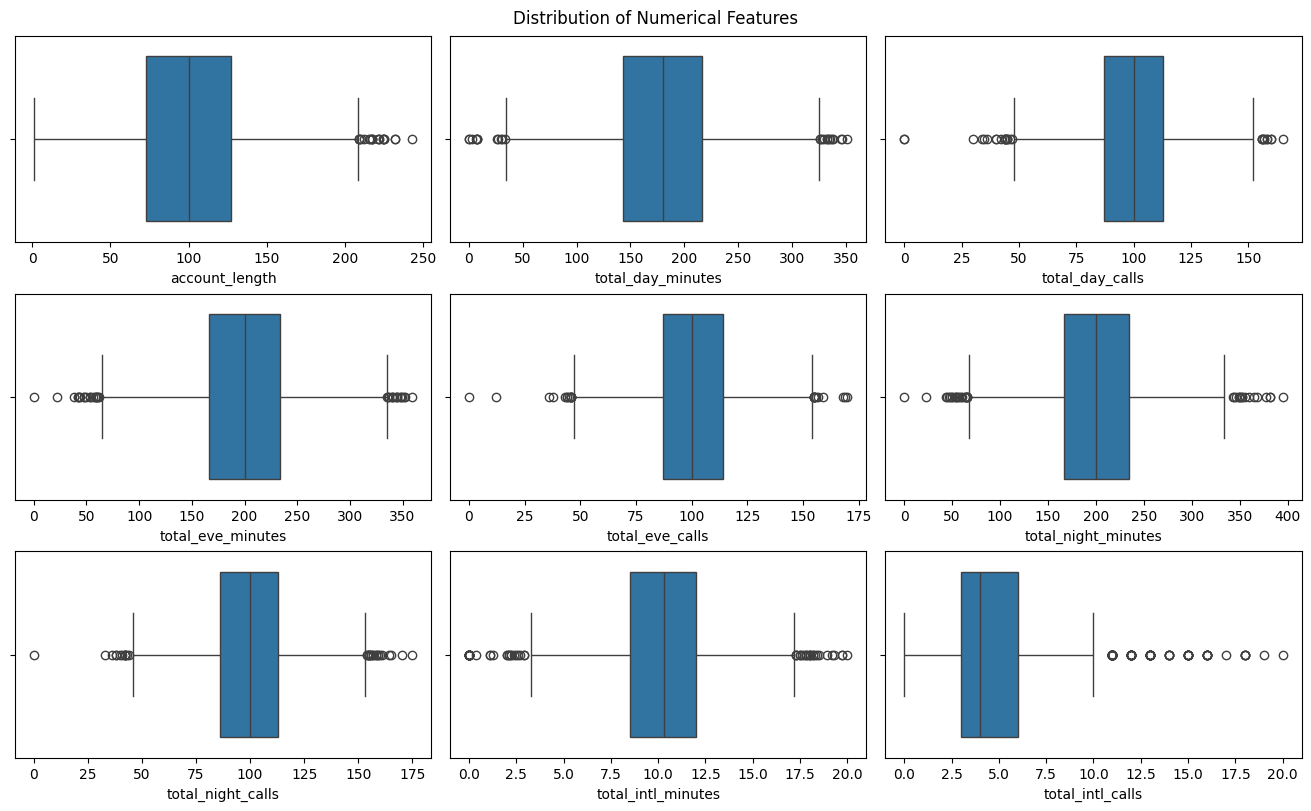

In [ ]:
# melihat sebaran data numerik
num_columns = [col for col in df.columns if (df[col].dtype == 'float') | (df[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df[num_columns[i]], ax=ax)

plt.suptitle('Distribution of Numerical Features')
plt.show()

### Sebaran Menurut Churn

#### Churn

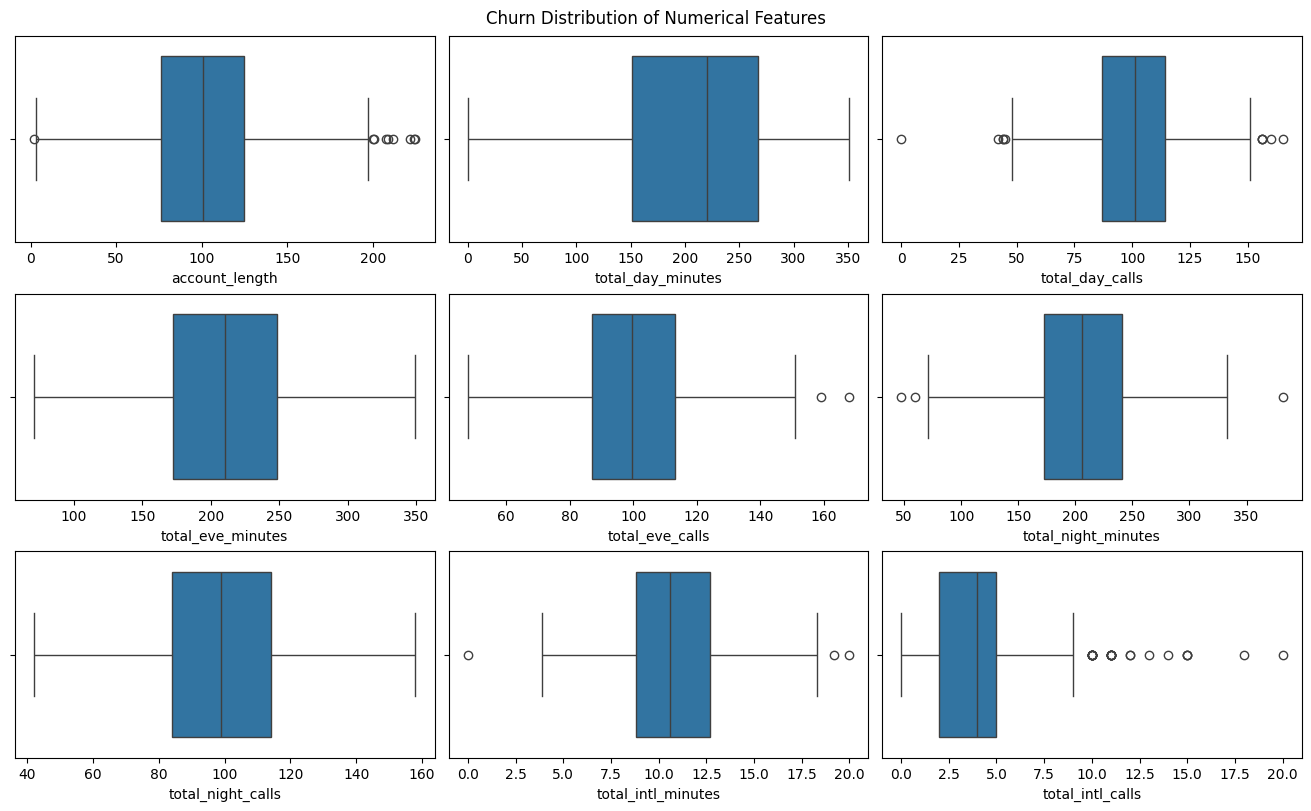

In [ ]:
# churn = yes
df_churn_yes = df[df['churn'] == 'yes']

num_columns = [col for col in df_churn_yes.columns if (df_churn_yes[col].dtype == 'float') | (df_churn_yes[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df_churn_yes[num_columns[i]], ax=ax)

plt.suptitle('Churn Distribution of Numerical Features')
plt.show()

In [ ]:
# IQR, lower bound, upper bound for numerical features
for i in df_churn_yes[[col for col in df_churn_yes.columns if (df_churn_yes[col].dtype == 'float') | (df_churn_yes[col].dtype == 'int')]].columns:
  iqr(df_churn_yes,i)

------------------------------
account_length

IQR: 49.0
Lower Bound: 2.5 | Jumlah data: 1
Upper Bound: 198.5 | Jumlah data: 8
Total outliers: 9
------------------------------ 

------------------------------
total_day_minutes

IQR: 115.80000000000001
Lower Bound: -22.525000000000006 | Jumlah data: 0
Upper Bound: 440.67500000000007 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_day_calls

IQR: 27.0
Lower Bound: 46.5 | Jumlah data: 5
Upper Bound: 154.5 | Jumlah data: 5
Total outliers: 10
------------------------------ 

------------------------------
total_eve_minutes

IQR: 75.94999999999999
Lower Bound: 58.22500000000002 | Jumlah data: 0
Upper Bound: 362.025 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_eve_calls

IQR: 26.0
Lower Bound: 48.0 | Jumlah data: 0
Upper Bound: 152.0 | Jumlah data: 2
Total outliers: 2
------------------------------ 

---------------------------

In [ ]:
# drop outlier
print(f'Jumlah baris sebelum memfilter outlier: {df_churn_yes.shape[0]}')
col_drop_outliers = [
   'total_intl_calls',
   'total_day_calls',
   'account_length',
   'total_night_minutes',
   'total_intl_minutes',
   'total_eve_calls']
filtered_entries = np.array([True] * len(df_churn_yes))
for col in col_drop_outliers:
    Q1 = df_churn_yes[col].quantile(0.25)
    Q3 = df_churn_yes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    filtered_entries = ((df_churn_yes[col] >= lower) & (df_churn_yes[col] <= upper)) & filtered_entries

df_churn_yes = df_churn_yes[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {df_churn_yes.shape[0]}')


Jumlah baris sebelum memfilter outlier: 598
Jumlah baris setelah memfilter outlier: 546


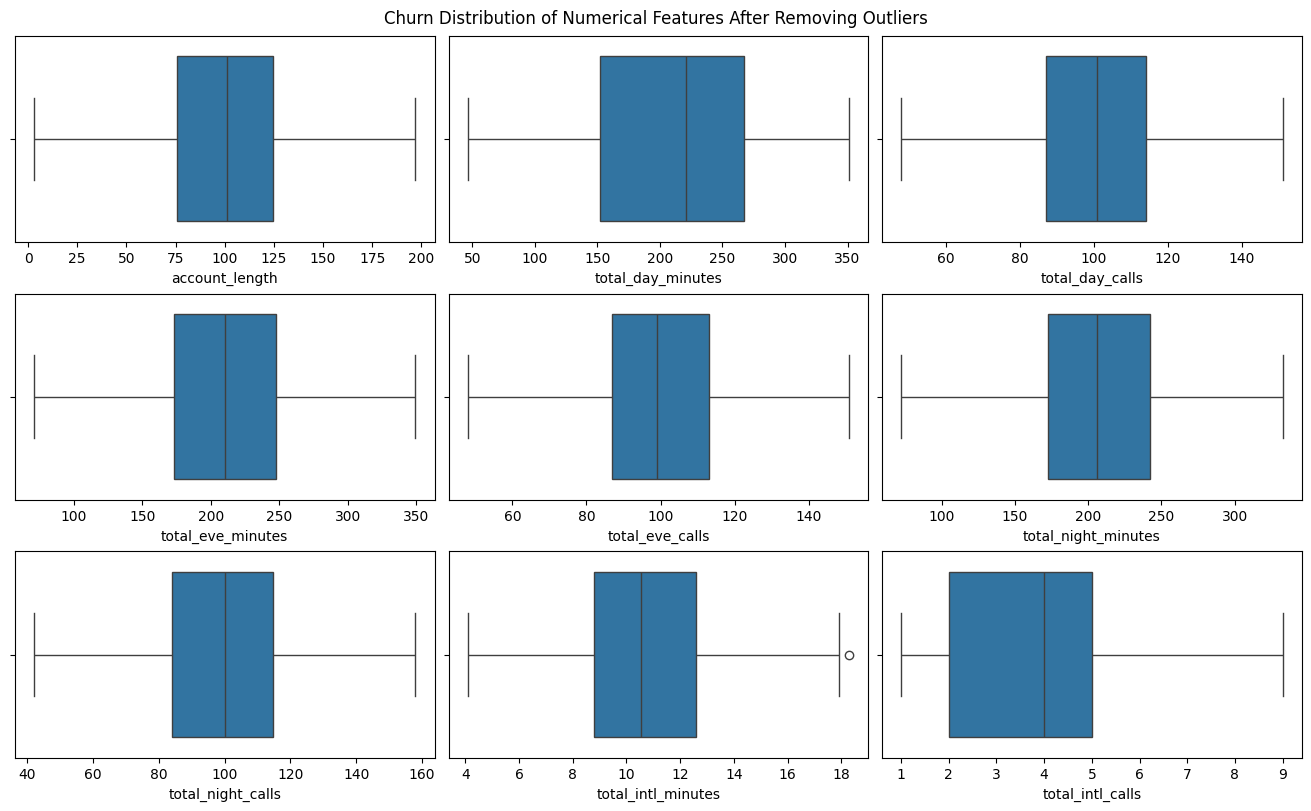

In [ ]:
# churn = yes
num_columns = [col for col in df_churn_yes.columns if (df_churn_yes[col].dtype == 'float') | (df_churn_yes[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df_churn_yes[num_columns[i]], ax=ax)

plt.suptitle('Churn Distribution of Numerical Features After Removing Outliers')
plt.show()

In [ ]:
# IQR, lower bound, upper bound for numerical features
for i in df_churn_yes[[col for col in df_churn_yes.columns if (df_churn_yes[col].dtype == 'float') | (df_churn_yes[col].dtype == 'int')]].columns:
  iqr(df_churn_yes,i)

------------------------------
account_length

IQR: 48.75
Lower Bound: 2.875 | Jumlah data: 0
Upper Bound: 197.875 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_day_minutes

IQR: 114.67500000000001
Lower Bound: -19.712500000000006 | Jumlah data: 0
Upper Bound: 438.98750000000007 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_day_calls

IQR: 27.0
Lower Bound: 46.5 | Jumlah data: 0
Upper Bound: 154.5 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_eve_minutes

IQR: 74.0
Lower Bound: 62.42500000000001 | Jumlah data: 0
Upper Bound: 358.425 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_eve_calls

IQR: 26.0
Lower Bound: 48.0 | Jumlah data: 0
Upper Bound: 152.0 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total

In [ ]:
# drop outlier kedua
print(f'Jumlah baris sebelum memfilter outlier: {df_churn_yes.shape[0]}')
col_drop_outliers = [
    'total_intl_minutes']
filtered_entries = np.array([True] * len(df_churn_yes))
for col in col_drop_outliers:
    Q1 = df_churn_yes[col].quantile(0.25)
    Q3 = df_churn_yes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    filtered_entries = ((df_churn_yes[col] >= lower) & (df_churn_yes[col] <= upper)) & filtered_entries

df_churn_yes = df_churn_yes[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {df_churn_yes.shape[0]}')


Jumlah baris sebelum memfilter outlier: 546
Jumlah baris setelah memfilter outlier: 545


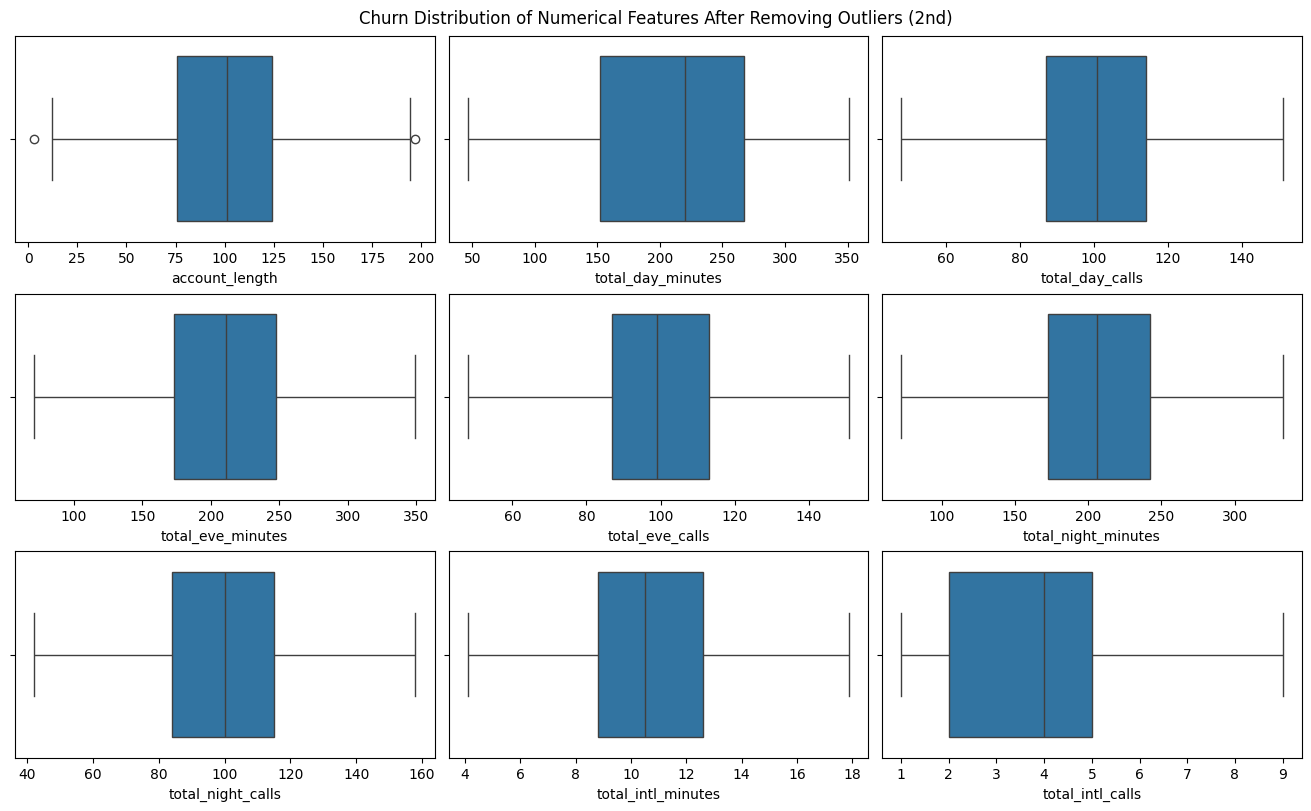

In [ ]:
# churn = yes
num_columns = [col for col in df_churn_yes.columns if (df_churn_yes[col].dtype == 'float') | (df_churn_yes[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df_churn_yes[num_columns[i]], ax=ax)

plt.suptitle('Churn Distribution of Numerical Features After Removing Outliers (2nd)')
plt.show()

In [ ]:
# IQR, lower bound, upper bound for numerical features
for i in df_churn_yes[[col for col in df_churn_yes.columns if (df_churn_yes[col].dtype == 'float') | (df_churn_yes[col].dtype == 'int')]].columns:
  iqr(df_churn_yes,i)

------------------------------
account_length

IQR: 48.0
Lower Bound: 4.0 | Jumlah data: 1
Upper Bound: 196.0 | Jumlah data: 1
Total outliers: 2
------------------------------ 

------------------------------
total_day_minutes

IQR: 115.0
Lower Bound: -20.5 | Jumlah data: 0
Upper Bound: 439.5 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_day_calls

IQR: 27.0
Lower Bound: 46.5 | Jumlah data: 0
Upper Bound: 154.5 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_eve_minutes

IQR: 74.29999999999998
Lower Bound: 61.85000000000004 | Jumlah data: 0
Upper Bound: 359.04999999999995 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_eve_calls

IQR: 26.0
Lower Bound: 48.0 | Jumlah data: 0
Upper Bound: 152.0 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_night_minutes

IQR: 

In [ ]:
# drop outlier kedua
print(f'Jumlah baris sebelum memfilter outlier: {df_churn_yes.shape[0]}')
col_drop_outliers = [
    'account_length']
filtered_entries = np.array([True] * len(df_churn_yes))
for col in col_drop_outliers:
    Q1 = df_churn_yes[col].quantile(0.25)
    Q3 = df_churn_yes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    filtered_entries = ((df_churn_yes[col] >= lower) & (df_churn_yes[col] <= upper)) & filtered_entries

df_churn_yes = df_churn_yes[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {df_churn_yes.shape[0]}')


Jumlah baris sebelum memfilter outlier: 545
Jumlah baris setelah memfilter outlier: 543


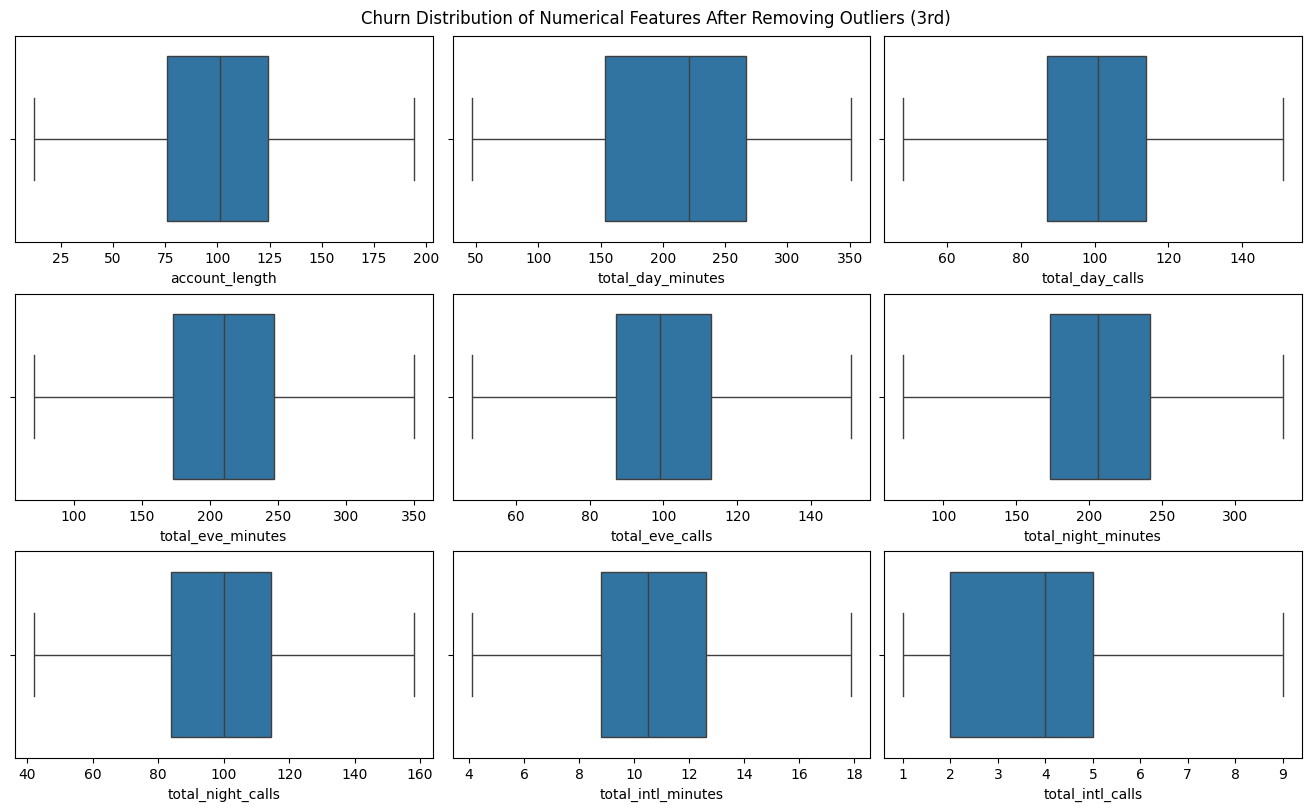

In [ ]:
# churn = yes
num_columns = [col for col in df_churn_yes.columns if (df_churn_yes[col].dtype == 'float') | (df_churn_yes[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df_churn_yes[num_columns[i]], ax=ax)

plt.suptitle('Churn Distribution of Numerical Features After Removing Outliers (3rd)')
plt.show()

#### No Churn

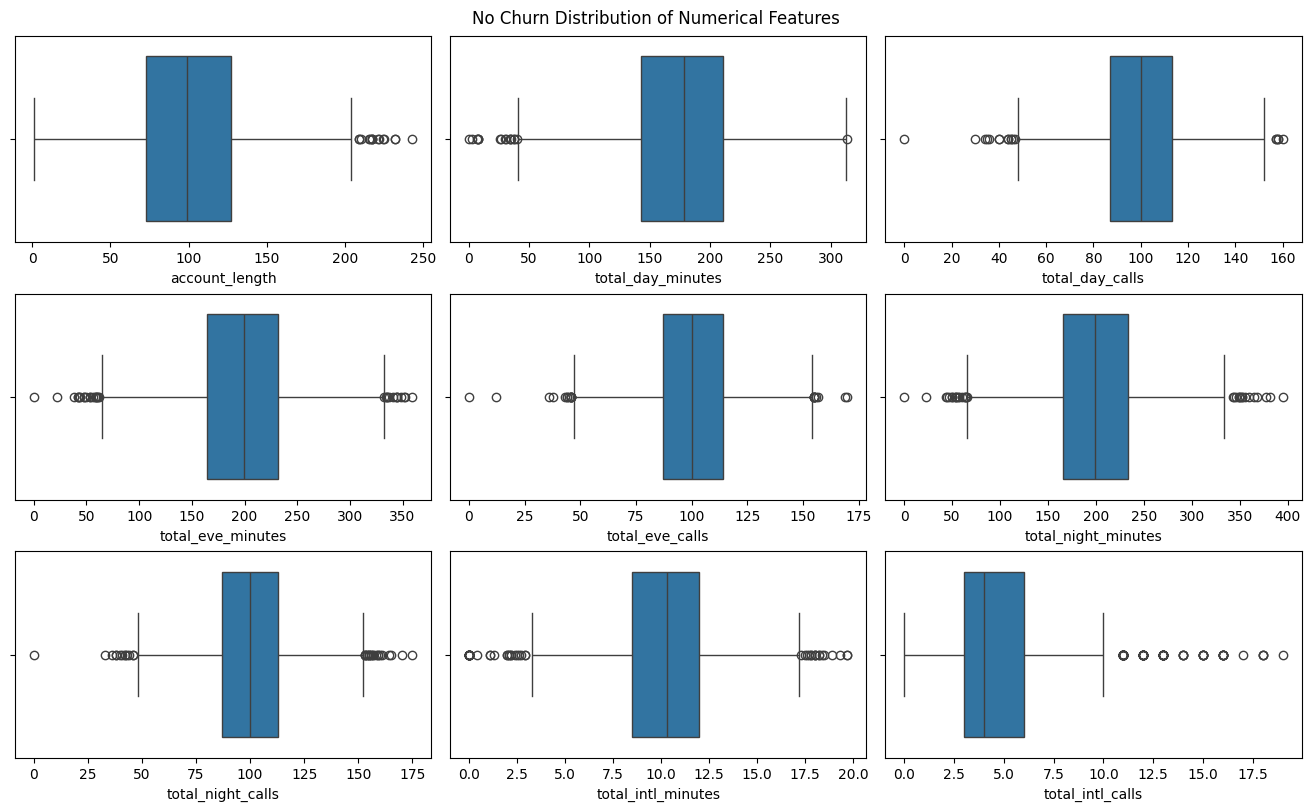

In [ ]:
# churn = no
df_churn_no = df[df['churn'] == 'no']

num_columns = [col for col in df_churn_no.columns if (df_churn_no[col].dtype == 'float') | (df_churn_no[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df_churn_no[num_columns[i]], ax=ax)

plt.suptitle('No Churn Distribution of Numerical Features')
plt.show()

In [ ]:
# IQR, lower bound, upper bound for numerical features
for i in df_churn_no[[col for col in df_churn_no.columns if (df_churn_no[col].dtype == 'float') | (df_churn_no[col].dtype == 'int')]].columns:
  iqr(df_churn_no,i)

------------------------------
account_length

IQR: 54.0
Lower Bound: -8.0 | Jumlah data: 0
Upper Bound: 208.0 | Jumlah data: 15
Total outliers: 15
------------------------------ 

------------------------------
total_day_minutes

IQR: 68.19999999999999
Lower Bound: 40.20000000000002 | Jumlah data: 16
Upper Bound: 313.0 | Jumlah data: 1
Total outliers: 17
------------------------------ 

------------------------------
total_day_calls

IQR: 26.0
Lower Bound: 48.0 | Jumlah data: 13
Upper Bound: 152.0 | Jumlah data: 5
Total outliers: 18
------------------------------ 

------------------------------
total_eve_minutes

IQR: 67.15
Lower Bound: 63.84999999999998 | Jumlah data: 19
Upper Bound: 332.45 | Jumlah data: 13
Total outliers: 32
------------------------------ 

------------------------------
total_eve_calls

IQR: 27.0
Lower Bound: 46.5 | Jumlah data: 13
Upper Bound: 154.5 | Jumlah data: 9
Total outliers: 22
------------------------------ 

------------------------------
total_night_mi

In [ ]:
# drop outlier
print(f'Jumlah baris sebelum memfilter outlier: {df_churn_no.shape[0]}')
col_drop_outliers = [
    'total_intl_calls',
    'total_intl_minutes',
    'total_night_calls',
    'total_night_minutes',
    'total_eve_minutes',
    'total_eve_calls',
    'total_day_calls',
    'total_day_minutes',
    'account_length'
    ]
filtered_entries = np.array([True] * len(df_churn_no))
for col in col_drop_outliers:
    Q1 = df_churn_no[col].quantile(0.25)
    Q3 = df_churn_no[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    filtered_entries = ((df_churn_no[col] >= lower) & (df_churn_no[col] <= upper)) & filtered_entries

df_churn_no = df_churn_no[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {df_churn_no.shape[0]}')


Jumlah baris sebelum memfilter outlier: 3652
Jumlah baris setelah memfilter outlier: 3359


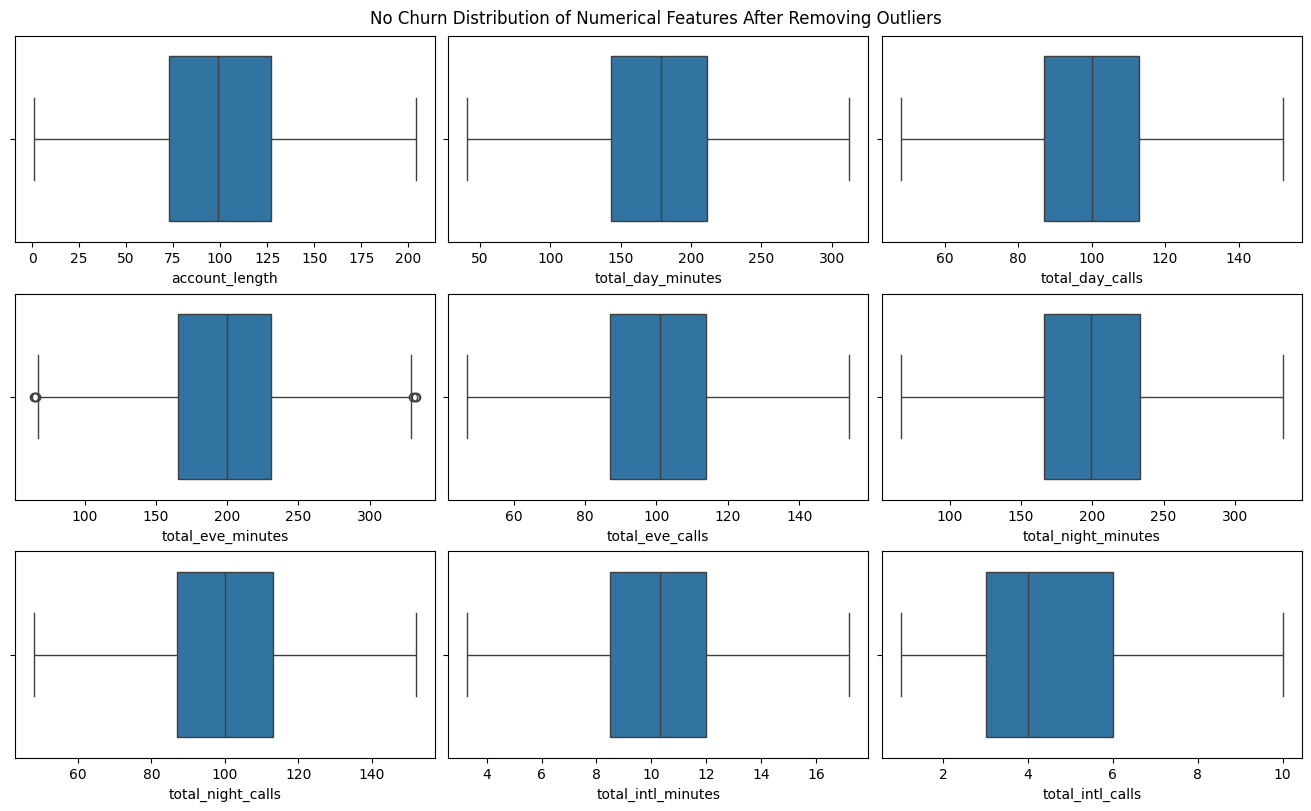

In [ ]:
# churn = no
num_columns = [col for col in df_churn_no.columns if (df_churn_no[col].dtype == 'float') | (df_churn_no[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df_churn_no[num_columns[i]], ax=ax)

plt.suptitle('No Churn Distribution of Numerical Features After Removing Outliers')
plt.show()

In [ ]:
# IQR, lower bound, upper bound for numerical features
for i in df_churn_no[[col for col in df_churn_no.columns if (df_churn_no[col].dtype == 'float') | (df_churn_no[col].dtype == 'int')]].columns:
  iqr(df_churn_no,i)

------------------------------
account_length

IQR: 54.0
Lower Bound: -8.0 | Jumlah data: 0
Upper Bound: 208.0 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_day_minutes

IQR: 68.1
Lower Bound: 40.750000000000014 | Jumlah data: 0
Upper Bound: 313.15 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_day_calls

IQR: 26.0
Lower Bound: 48.0 | Jumlah data: 0
Upper Bound: 152.0 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_eve_minutes

IQR: 65.65
Lower Bound: 66.77499999999999 | Jumlah data: 3
Upper Bound: 329.375 | Jumlah data: 3
Total outliers: 6
------------------------------ 

------------------------------
total_eve_calls

IQR: 27.0
Lower Bound: 46.5 | Jumlah data: 0
Upper Bound: 154.5 | Jumlah data: 0
Total outliers: 0
------------------------------ 

------------------------------
total_night_minutes

IQR: 67.149999

In [ ]:
# drop outlier kedua
print(f'Jumlah baris sebelum memfilter outlier: {df_churn_no.shape[0]}')
col_drop_outliers = [
    'total_eve_minutes'
    ]
filtered_entries = np.array([True] * len(df_churn_no))
for col in col_drop_outliers:
    Q1 = df_churn_no[col].quantile(0.25)
    Q3 = df_churn_no[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    filtered_entries = ((df_churn_no[col] >= lower) & (df_churn_no[col] <= upper)) & filtered_entries

df_churn_no = df_churn_no[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {df_churn_no.shape[0]}')


Jumlah baris sebelum memfilter outlier: 3359
Jumlah baris setelah memfilter outlier: 3353


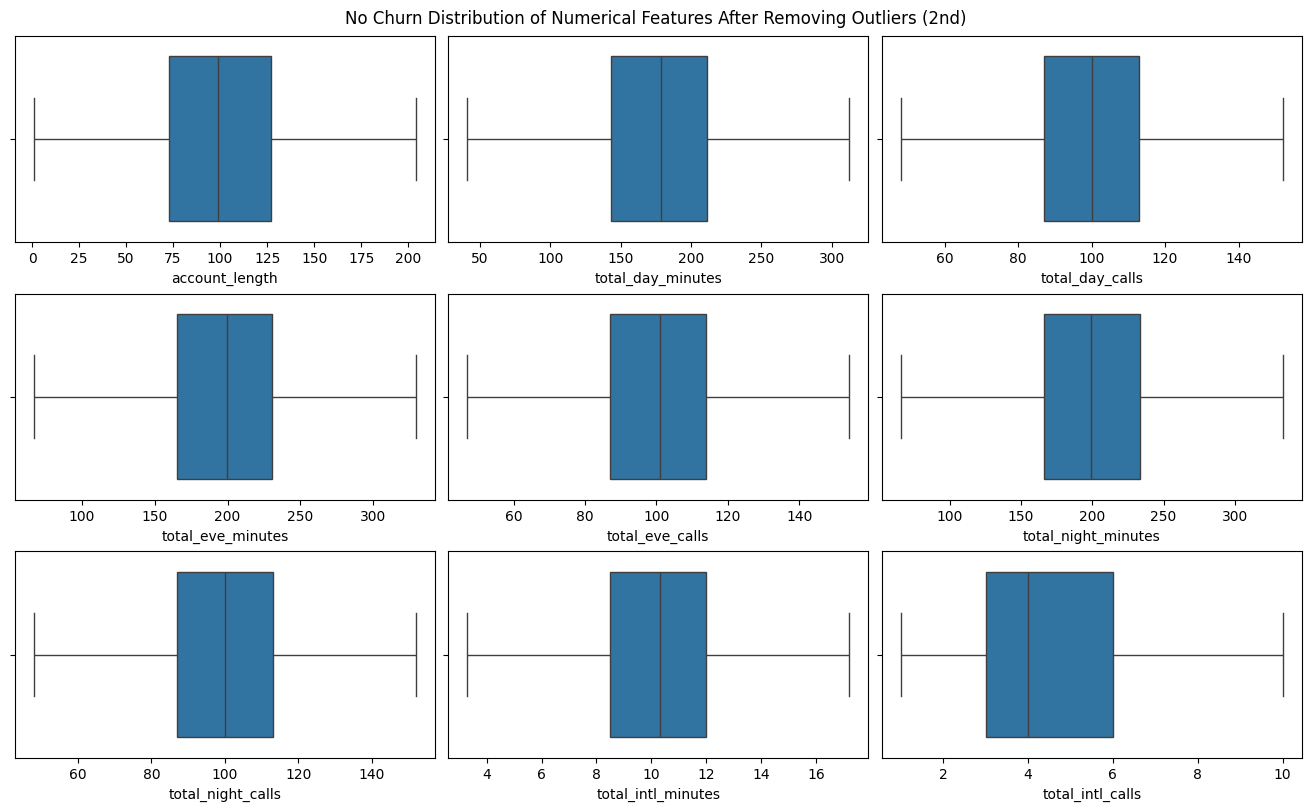

In [ ]:
# churn = no
num_columns = [col for col in df_churn_no.columns if (df_churn_no[col].dtype == 'float') | (df_churn_no[col].dtype == 'int')]

fig, axes = plt.subplots(ncols=3, nrows=3,figsize = (13,8),layout='constrained')

for i, ax in zip(range(len(num_columns)), axes.flat):
    sns.boxplot(x = df_churn_no[num_columns[i]], ax=ax)

plt.suptitle('No Churn Distribution of Numerical Features After Removing Outliers (2nd)')
plt.show()

#### All

In [ ]:
df = pd.concat([df_churn_yes,df_churn_no], axis = 0)
df = df.reset_index(drop=True)

In [ ]:
df.churn.value_counts()

churn
no     3353
yes     543
Name: count, dtype: int64

In [ ]:
df.head()

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,churn
0,65,no,no,129.1,137,228.5,83,208.8,111,12.7,6,yes
1,161,no,no,332.9,67,317.8,97,160.6,128,5.4,9,yes
2,77,no,no,62.4,89,169.9,121,209.6,64,5.7,6,yes
3,12,no,no,249.6,118,252.4,119,280.2,90,11.8,3,yes
4,121,no,yes,198.4,129,75.3,77,181.2,77,5.8,3,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   account_length       3896 non-null   int64  
 1   international_plan   3896 non-null   object 
 2   voice_mail_plan      3896 non-null   object 
 3   total_day_minutes    3896 non-null   float64
 4   total_day_calls      3896 non-null   int64  
 5   total_eve_minutes    3896 non-null   float64
 6   total_eve_calls      3896 non-null   int64  
 7   total_night_minutes  3896 non-null   float64
 8   total_night_calls    3896 non-null   int64  
 9   total_intl_minutes   3896 non-null   float64
 10  total_intl_calls     3896 non-null   int64  
 11  churn                3896 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 365.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3896.0,99.557238,38.828193,1.0,73.0,99.00,126.000,204.0
total_day_minutes,3896.0,180.907341,53.063780,40.9,143.7,180.50,216.800,351.5
total_day_calls,3896.0,99.893994,19.290690,48.0,87.0,100.00,113.000,152.0
total_eve_minutes,3896.0,200.271612,48.479146,67.0,166.9,200.90,233.325,349.4
total_eve_calls,3896.0,100.162474,19.369604,47.0,87.0,100.00,113.000,154.0
total_night_minutes,3896.0,200.749384,48.778961,65.7,167.3,200.75,234.900,333.5
total_night_calls,3896.0,99.748717,19.407759,42.0,86.0,100.00,113.000,158.0
total_intl_minutes,3896.0,10.310678,2.558812,3.3,8.6,10.40,12.000,17.9
total_intl_calls,3896.0,4.233573,2.057919,1.0,3.0,4.00,5.000,10.0


## Feature Encoding

In [ ]:
def feature_encode(df, columns):
  for col in df.columns:
    if col == 'churn':
      df[col] = df[col].replace({'yes':1,'no':0})
    else:
      if df[col].dtype == 'object':
        df_dummies = pd.get_dummies(df[col],prefix = col, drop_first = True, dtype = int)
        df = df.drop(col,axis = 1)
        df = pd.concat([df,df_dummies], axis = 1)

  return df

In [ ]:
columns = ['international_plan','voice_mail_plan','churn']
df = feature_encode(df,columns)

In [ ]:
df.head()

,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,churn,international_plan_yes,voice_mail_plan_yes
0,65,129.1,137,228.5,83,208.8,111,12.7,6,1,0,0
1,161,332.9,67,317.8,97,160.6,128,5.4,9,1,0,0
2,77,62.4,89,169.9,121,209.6,64,5.7,6,1,0,0
3,12,249.6,118,252.4,119,280.2,90,11.8,3,1,0,0
4,121,198.4,129,75.3,77,181.2,77,5.8,3,1,0,1


## Standardization

In [ ]:
# split to train and test
# train:test 70:30
X = df.drop('churn',axis = 1)
Y = df['churn']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

In [ ]:
print(f'ukuran x train: {x_train.shape}')
print(f'ukuran x test: {x_test.shape}')
print(f'jumlah kelas y train: {Counter(y_train)}')
print(f'jumlah kelas y test: {Counter(y_test)}')

ukuran x train: (2727, 11)
ukuran x test: (1169, 11)
jumlah kelas y train: Counter({0: 2347, 1: 380})
jumlah kelas y test: Counter({0: 1006, 1: 163})


In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.214826,-0.293155,1.134893,0.240356,0.346339,0.021917,-0.292670,-0.782865,-0.591251,-0.309937,-0.591043
1,-0.647167,2.183440,0.618998,0.017044,-0.017517,0.282022,-0.598968,-0.237121,-0.104727,-0.309937,-0.591043
2,-0.260127,-1.630741,0.361051,-0.177587,-0.797210,-0.099878,1.596170,1.828909,0.381797,-0.309937,-0.591043
3,0.333334,-0.246321,-2.424781,-0.265682,-1.680861,0.071461,1.289871,-0.198139,-0.591251,-0.309937,-0.591043
4,-0.363338,1.381637,0.722177,-0.120222,-0.901169,1.559841,-1.109466,-2.576023,0.381797,-0.309937,-0.591043
...,...,...,...,...,...,...,...,...,...,...,...
2722,-0.466549,-0.671576,-0.567560,0.049823,-1.576902,0.234543,-0.394770,-0.315084,0.381797,-0.309937,1.691924
2723,-1.808287,-0.602261,-0.361202,-0.218561,-0.225435,-1.520135,-1.466814,-1.679444,-0.591251,-0.309937,1.691924
2724,-1.808287,0.263236,-1.496171,-1.517462,-1.368984,-1.082497,-0.650018,1.517056,-0.104727,-0.309937,-0.591043
2725,-0.827786,1.190554,0.928535,-0.312803,-0.329394,-0.153550,0.626225,-0.860828,-0.591251,-0.309937,-0.591043


In [ ]:
pd.DataFrame(x_test_norm)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.730879,0.960129,-0.154844,-0.347632,0.554257,0.118941,0.575175,1.049275,-1.077774,-0.309937,1.691924
1,-0.879391,-1.567047,1.960325,-0.562750,0.086442,1.262578,-0.394770,-0.432029,-0.104727,-0.309937,-0.591043
2,0.462347,0.615429,-0.309613,-1.279808,2.529479,-1.080433,0.115728,-0.159157,-1.564298,-0.309937,-0.591043
3,1.081612,0.504900,1.496019,-0.208318,-0.745230,-1.163006,-0.343720,0.659458,2.327893,-0.309937,-0.591043
4,2.165324,-1.372216,-0.670739,-0.345583,0.814155,-0.504486,0.473076,1.244184,-1.077774,-0.309937,-0.591043
...,...,...,...,...,...,...,...,...,...,...,...
1164,0.539755,0.207034,1.186482,0.121529,0.242380,1.696086,-0.343720,0.191678,-0.591251,-0.309937,-0.591043
1165,0.230123,-0.220094,1.857146,-0.548408,0.034462,0.279958,0.268877,-0.315084,1.354845,-0.309937,1.691924
1166,0.101110,-0.128299,2.630988,-1.074934,-2.304615,-0.677889,0.473076,2.140763,-0.591251,-0.309937,-0.591043
1167,-0.234325,-0.250068,0.154693,0.418596,-1.317005,0.480198,0.268877,-0.821846,-1.077774,-0.309937,1.691924


## Balancing Data

In [ ]:
sm = SMOTE(random_state = 42, k_neighbors = 3)
x_res, y_res = sm.fit_resample(x_train_norm,y_train)

In [ ]:
print(f'Jumlah kelas target sebelum resample: {Counter(y_train)}')
print(f'Jumlah kelas target setelah resample: {Counter(y_res)}')

Jumlah kelas target sebelum resample: Counter({0: 2347, 1: 380})
Jumlah kelas target setelah resample: Counter({0: 2347, 1: 2347})


# Modelling

## Logistic Regression

In [ ]:
lr = LogisticRegression()

lr.fit(x_res,y_res)

y_pred_lr = lr.predict(x_test_norm)

## Naive Bayes

In [ ]:
bnb = BernoulliNB()

bnb.fit(x_res,y_res)

y_pred_nb = bnb.predict(x_test_norm)

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_res,y_res)

y_pred_knn = knn.predict(x_test_norm)

## SVM

In [ ]:
svm = SVC()

svm.fit(x_res,y_res)

y_pred_svm = svm.predict(x_test_norm)

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(x_res,y_res)

y_pred_dt = dt.predict(x_test_norm)

## Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier()

gbc.fit(x_res, y_res)

y_pred_gbc = gbc.predict(x_test_norm)

# Evaluate

In [ ]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1006
           1       0.27      0.60      0.37       163

    accuracy                           0.72      1169
   macro avg       0.60      0.67      0.60      1169
weighted avg       0.83      0.72      0.76      1169



In [ ]:
print('Naive Bayes:')
print(classification_report(y_test, y_pred_nb))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1006
           1       0.24      0.63      0.35       163

    accuracy                           0.67      1169
   macro avg       0.58      0.65      0.56      1169
weighted avg       0.82      0.67      0.72      1169



In [ ]:
print('KNN:')
print(classification_report(y_test, y_pred_knn))

KNN:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1006
           1       0.33      0.57      0.42       163

    accuracy                           0.78      1169
   macro avg       0.62      0.69      0.64      1169
weighted avg       0.84      0.78      0.80      1169



In [ ]:
print('SVM:')
print(classification_report(y_test, y_pred_svm))

SVM:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1006
           1       0.45      0.54      0.49       163

    accuracy                           0.84      1169
   macro avg       0.69      0.72      0.70      1169
weighted avg       0.86      0.84      0.85      1169



In [ ]:
print('Decision Tree:')
print(classification_report(y_test, y_pred_dt))

Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1006
           1       0.42      0.56      0.48       163

    accuracy                           0.83      1169
   macro avg       0.67      0.72      0.69      1169
weighted avg       0.85      0.83      0.84      1169



In [ ]:
print('Gradient Boosting Classifier:')
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1006
           1       0.82      0.56      0.67       163

    accuracy                           0.92      1169
   macro avg       0.88      0.77      0.81      1169
weighted avg       0.92      0.92      0.92      1169



Hasil evaluasi, metode terbaik adalah svm dan gradient boosting

In [ ]:
print('SVM:\n')
print('train f1 score',f1_score(y_res,svm.predict(x_res),average='weighted'))
print('test f1 score',f1_score(y_test,y_pred_svm,average='weighted'))

SVM:

train f1 score 0.8890713401331719
test f1 score 0.8493456740107286


In [ ]:
print('Gradient Boosting:\n')
print('train f1 score',f1_score(y_res,gbc.predict(x_res),average='weighted'))
print('test f1 score',f1_score(y_test,y_pred_gbc,average='weighted'))

Gradient Boosting:

train f1 score 0.9228322900380237
test f1 score 0.9158996034283171


# Prediction

In [ ]:
url = 'https://github.com/radi23/final-challenge-fga1/raw/main/Data%20Test_Challenge2.csv'
df_test = pd.read_csv(url)
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_test = df_test.drop(['id','state','area_code','number_vmail_messages','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_customer_service_calls'],axis = 1)

columns = ['area_code','international_plan','voice_mail_plan']
df_test = feature_encode(df_test,columns)


In [ ]:
df_test.head()

,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,international_plan_yes,voice_mail_plan_yes
0,128,265.1,110,197.4,99,244.7,91,10.0,3,0,1
1,118,223.4,98,220.6,101,203.9,118,6.3,6,1,0
2,62,120.7,70,307.2,76,203.0,99,13.1,6,0,0
3,93,190.7,114,218.2,111,129.6,121,8.1,3,0,0
4,174,124.3,76,277.1,112,250.7,115,15.5,5,0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          750 non-null    int64  
 1   total_day_minutes       750 non-null    float64
 2   total_day_calls         750 non-null    int64  
 3   total_eve_minutes       750 non-null    float64
 4   total_eve_calls         750 non-null    int64  
 5   total_night_minutes     750 non-null    float64
 6   total_night_calls       750 non-null    int64  
 7   total_intl_minutes      750 non-null    float64
 8   total_intl_calls        750 non-null    int64  
 9   international_plan_yes  750 non-null    int64  
 10  voice_mail_plan_yes     750 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 64.6 KB


In [ ]:
# standarization
test_scaled = scaler.transform(df_test)

In [ ]:
pd.DataFrame(test_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.746177,1.565228,0.515819,-0.062857,-0.069497,0.901320,-0.445819,-0.120176,-0.591251,-0.309937,1.691924
1,0.488150,0.784032,-0.103255,0.412450,0.034462,0.059075,0.932523,-1.562499,0.868321,3.226460,-0.591043
2,-0.956799,-1.139918,-1.547760,2.186658,-1.265025,0.040496,-0.037421,1.088257,0.868321,-0.309937,-0.591043
3,-0.156917,0.171440,0.722177,0.363280,0.554257,-1.474719,1.085672,-0.860828,-0.591251,-0.309937,-0.591043
4,1.933100,-1.072477,-1.238223,1.569988,0.606237,1.025180,0.779374,2.023818,0.381797,-0.309937,-0.591043


In [ ]:
test_yhat = gbc.predict(test_scaled)

In [ ]:
df_test['churn'] = test_yhat

In [ ]:
df_test['churn'].value_counts()

churn
0    668
1     82
Name: count, dtype: int64

In [ ]:
df_test.to_csv('/content/Data Test Prediksi.csv')